In [77]:
import json

with open('indoor-loc/Server/collected_data/ibeacons/1525669061400.json', 'r') as f:
    data = json.load(f)

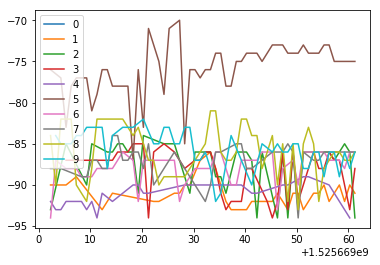

In [82]:
class iBeaconData:
    def __init__(self, entry):
        self.rssi = entry['rssi']
        self.proximity = entry['proximity']
        self.minor = entry['minor']
        self.accuracy = entry['accuracy']
        self.timestamp = entry['timestamp']
        
    def __repr__(self):
        return "iBeacon({})@{}: rssi={}, prox={}, accu={}".format(self.minor, self.timestamp, self.rssi, self.proximity, self.accuracy)
    
def get_data_by_timestamp(data):
    timestamp = None
    data_by_timestamp = {}
    for entry in data:
        if entry['rssi'] == 0:
            continue
        if entry['timestamp'] != timestamp:
            timestamp = entry['timestamp']
        data_by_timestamp[timestamp] = data_by_timestamp.get(timestamp, []) + [iBeaconData(entry)]

    return data_by_timestamp

def get_ibeacon(minor, ibeacons_by_timestamp):
    ibeacon_over_time = []
    for timestamp in list(sorted(ibeacons_by_timestamp.keys())):
        ibeacons = ibeacons_by_timestamp[timestamp] 
        target_ibeacons = filter(lambda ibeacon: ibeacon.minor == minor, ibeacons)
        if len(target_ibeacons) > 0:
            ibeacon_over_time.append(target_ibeacons[0])
    return ibeacon_over_time

ibeacons_by_timestamp = get_data_by_timestamp(data)
for minor in range(10):
    ex_ibeacon = get_ibeacon(minor, ibeacons_by_timestamp)
    ex_ibeacon_timestamps = list(map(lambda ib: ib.timestamp, ex_ibeacon))
    ex_ibeacon_rssis = list(map(lambda ib: ib.rssi, ex_ibeacon))

    import matplotlib.pyplot as plt
    plt.plot(ex_ibeacon_timestamps, ex_ibeacon_rssis, label=minor)
    # plt.axis([-10, 288, -10, 288])
plt.legend()
plt.show()
